<a href="https://colab.research.google.com/github/carlosmedeirost/Projeto-IN243/blob/master/Bananas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install seaborn
import seaborn as sns
import plotly.express as px
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lucheol/in243/master/projeto/bananas.csv")
df.head()

,temperatura,humidade,cor,pronto_para_consumo
0,9.590963,97.007535,verde,NAO
1,18.081287,96.467236,verde,NAO
2,12.884049,95.604222,amarela,SIM
3,18.831052,96.641953,amarela,NAO
4,13.539014,92.978037,preta,NAO


In [3]:
swap ={
    'SIM' : 1,
    'NAO': 0
}
df['pronto_para_consumo'] = df['pronto_para_consumo'].map(swap)
df.head()

,temperatura,humidade,cor,pronto_para_consumo
0,9.590963,97.007535,verde,0
1,18.081287,96.467236,verde,0
2,12.884049,95.604222,amarela,1
3,18.831052,96.641953,amarela,0
4,13.539014,92.978037,preta,0


In [4]:
swap ={
    'verde' : 0,
    'amarela': 1,
    'preta': 2
}
df['cor'] = df['cor'].map(swap)
df.head()

,temperatura,humidade,cor,pronto_para_consumo
0,9.590963,97.007535,0,0
1,18.081287,96.467236,0,0
2,12.884049,95.604222,1,1
3,18.831052,96.641953,1,0
4,13.539014,92.978037,2,0


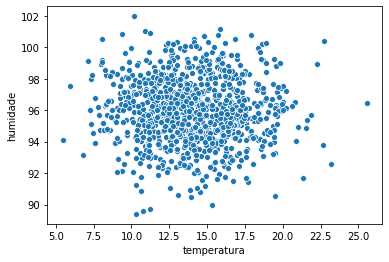

In [5]:
sns.scatterplot(x='temperatura', y='humidade', data=df)

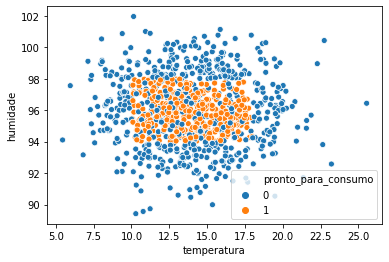

In [6]:
sns.scatterplot(x='temperatura', y='humidade', hue='pronto_para_consumo', data=df)

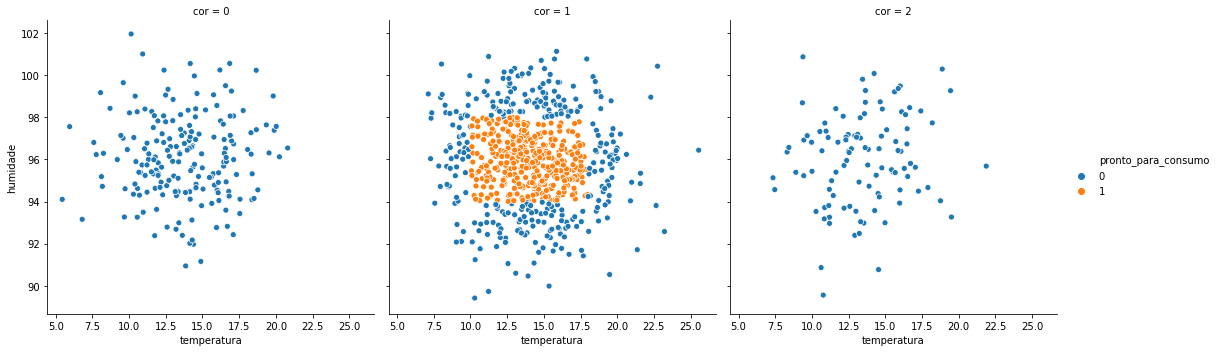

In [7]:
sns.relplot(x='temperatura', y='humidade',col='cor', hue='pronto_para_consumo', data=df)

In [0]:
x = df[['temperatura', 'humidade']]
y = df['pronto_para_consumo']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state=20, test_size=0.25, stratify=y)

model = LinearSVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_acuracia = accuracy_score(teste_y, previsoes)
print(f"Accuracy: {taxa_acuracia*100}%")  

Accuracy: 60.8%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(treino_x)
teste_x = scaler.transform(teste_x)

model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
accuracy_score(teste_y, previsoes) *100

80.0

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

pd.np.random.seed(5)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify=y)

model = DecisionTreeClassifier()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
accuracy_score(teste_y, previsoes) *100

80.80000000000001

In [0]:
from joblib import dump, load
dump(model, 'tree_model.joblib')
loaded_model = load('tree_model.joblib')

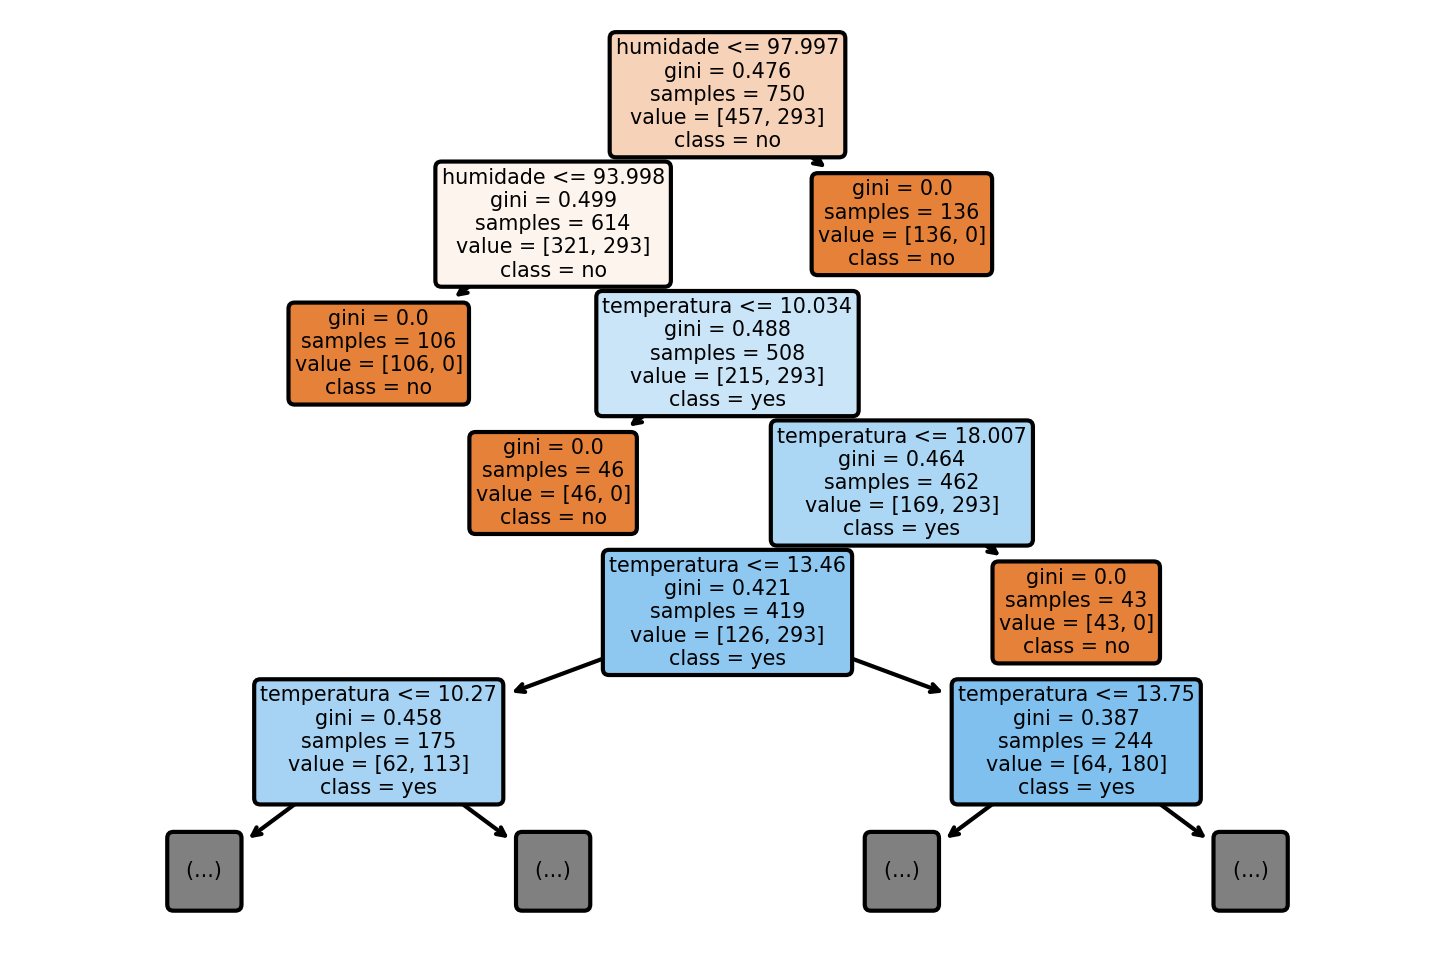

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
features = x.columns
plt.figure(dpi=300)
plot_tree(model, max_depth=5, filled=True, feature_names=features, rounded=True, class_names = ['no', 'yes'])
plt.show()

In [14]:
df.shape

(1000, 4)

In [15]:
len(teste_y)

250

In [0]:
baseline = pd.np.ones(250)

In [17]:
accuracy_score(teste_y, baseline)

0.392

In [18]:
x_min = teste_x['temperatura'].min()
x_max = teste_x['temperatura'].max()
y_min = teste_x['humidade'].min()
y_max = teste_x['humidade'].max()

x_min, x_max, y_min, y_max

(7.124219121, 20.98360206, 89.41782933, 100.86773840000001)

In [19]:
eixo_x = pd.np.arange(x_min, x_max, (x_max - x_min)/100)
eixo_x

array([ 7.12421912,  7.26281295,  7.40140678,  7.54000061,  7.67859444,
        7.81718827,  7.9557821 ,  8.09437593,  8.23296976,  8.37156359,
        8.51015741,  8.64875124,  8.78734507,  8.9259389 ,  9.06453273,
        9.20312656,  9.34172039,  9.48031422,  9.61890805,  9.75750188,
        9.89609571, 10.03468954, 10.17328337, 10.3118772 , 10.45047103,
       10.58906486, 10.72765869, 10.86625251, 11.00484634, 11.14344017,
       11.282034  , 11.42062783, 11.55922166, 11.69781549, 11.83640932,
       11.97500315, 12.11359698, 12.25219081, 12.39078464, 12.52937847,
       12.6679723 , 12.80656613, 12.94515996, 13.08375378, 13.22234761,
       13.36094144, 13.49953527, 13.6381291 , 13.77672293, 13.91531676,
       14.05391059, 14.19250442, 14.33109825, 14.46969208, 14.60828591,
       14.74687974, 14.88547357, 15.0240674 , 15.16266123, 15.30125506,
       15.43984888, 15.57844271, 15.71703654, 15.85563037, 15.9942242 ,
       16.13281803, 16.27141186, 16.41000569, 16.54859952, 16.68

In [20]:
eixo_y = pd.np.arange(y_min, y_max, (y_max - y_min)/100)
eixo_y

array([ 89.41782933,  89.53232842,  89.64682751,  89.7613266 ,
        89.87582569,  89.99032478,  90.10482387,  90.21932296,
        90.33382206,  90.44832115,  90.56282024,  90.67731933,
        90.79181842,  90.90631751,  91.0208166 ,  91.13531569,
        91.24981478,  91.36431387,  91.47881296,  91.59331205,
        91.70781114,  91.82231023,  91.93680933,  92.05130842,
        92.16580751,  92.2803066 ,  92.39480569,  92.50930478,
        92.62380387,  92.73830296,  92.85280205,  92.96730114,
        93.08180023,  93.19629932,  93.31079841,  93.4252975 ,
        93.5397966 ,  93.65429569,  93.76879478,  93.88329387,
        93.99779296,  94.11229205,  94.22679114,  94.34129023,
        94.45578932,  94.57028841,  94.6847875 ,  94.79928659,
        94.91378568,  95.02828477,  95.14278386,  95.25728296,
        95.37178205,  95.48628114,  95.60078023,  95.71527932,
        95.82977841,  95.9442775 ,  96.05877659,  96.17327568,
        96.28777477,  96.40227386,  96.51677295,  96.63

In [21]:
xx, yy = pd.np.meshgrid(eixo_x, eixo_y)
xx, yy

(array([[ 7.12421912,  7.26281295,  7.40140678, ..., 20.56782057,
         20.7064144 , 20.84500823],
        [ 7.12421912,  7.26281295,  7.40140678, ..., 20.56782057,
         20.7064144 , 20.84500823],
        [ 7.12421912,  7.26281295,  7.40140678, ..., 20.56782057,
         20.7064144 , 20.84500823],
        ...,
        [ 7.12421912,  7.26281295,  7.40140678, ..., 20.56782057,
         20.7064144 , 20.84500823],
        [ 7.12421912,  7.26281295,  7.40140678, ..., 20.56782057,
         20.7064144 , 20.84500823],
        [ 7.12421912,  7.26281295,  7.40140678, ..., 20.56782057,
         20.7064144 , 20.84500823]]),
 array([[ 89.41782933,  89.41782933,  89.41782933, ...,  89.41782933,
          89.41782933,  89.41782933],
        [ 89.53232842,  89.53232842,  89.53232842, ...,  89.53232842,
          89.53232842,  89.53232842],
        [ 89.64682751,  89.64682751,  89.64682751, ...,  89.64682751,
          89.64682751,  89.64682751],
        ...,
        [100.52424113, 100.52424113,

In [24]:
pontos = pd.np.c_[xx.ravel(), yy.ravel()]
pontos

array([[  7.12421912,  89.41782933],
       [  7.26281295,  89.41782933],
       [  7.40140678,  89.41782933],
       ...,
       [ 20.56782057, 100.75323931],
       [ 20.7064144 , 100.75323931],
       [ 20.84500823, 100.75323931]])

In [26]:
z = model.predict(pontos)
z

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
z.shape

(10000,)

In [29]:
xx.shape

(100, 100)

In [30]:
z1 = z.reshape((100,100))
z1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

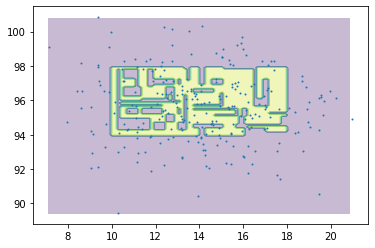

In [31]:
import matplotlib.pyplot as plt
plt.contourf(xx,yy, z1,alpha=0.3)
plt.scatter(teste_x['temperatura'], teste_x['humidade'], s=1)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, random_state=20, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

model = SVC(random_state=20)
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_acuracia = accuracy_score(teste_y, previsoes)
print(f"Acurracy: {taxa_acuracia*100}")

Acurracy: 82.0


In [0]:
data_x_temperatura = treino_x[:,0]
data_y_humidade = treino_x[:,1]

In [0]:
x_min = data_x_temperatura.min()
x_max = data_x_temperatura.max()
y_min = data_y_humidade.min()
y_max = data_y_humidade.max()

eixo_x = pd.np.arange(x_min, x_max, (x_max - x_min)/100)
eixo_y = pd.np.arange(y_min, y_max, (y_max - y_min)/100)

xx, yy = pd.np.meshgrid(eixo_x, eixo_y)
pontos = pd.np.c_[xx.ravel(), yy.ravel()]

In [0]:
z = model.predict(pontos)
z = z.reshape(xx.shape)

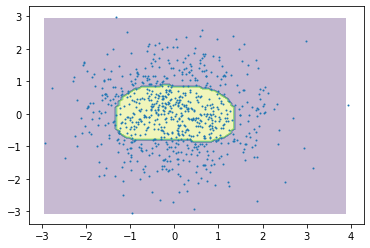

In [41]:
import matplotlib.pyplot as plt
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(data_x_temperatura, data_y_humidade,s=1)